 **Dataset**
--
    Data Science EDA
    
### **Data Description**
The dataset was collected through Google Forms as part of a college-level student research project focused on personality traits and behavioral tendencies among students. Participants responded to questions on a 0–10 scale for consistency and simplicity in analysis.

### **Features**
    Time_spent_Alone: Hours spent alone daily (0–11)
    
    Stage_fear: Presence of stage fright (Yes/No)
    
    Social_event_attendance: Frequency of social events (0–10)
    
    Going_outside: Frequency of going outside (0–7)
    
    Drained_after_socializing: Feeling drained after socializing (Yes/No)
    
    Friends_circle_size: Number of close friends (0–15)
    
    Post_frequency: Social media post frequency (0–10)
    
    Personality: Target variable (Extrovert/Introvert)

## **Import Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings 
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv
/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# **EDA**

## **Data Exploration**
    During this step we can explore the shape of the data we are working with. It's usual to check and deal with the number of columns and rows, missing values, outliers and other inconsistencies that might appear.
--

In [3]:
df = pd.read_csv('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [4]:
df.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

In [5]:
df.isna().mean() # Evaluating the % of missing values in every column

Time_spent_Alone             0.021724
Stage_fear                   0.025172
Social_event_attendance      0.021379
Going_outside                0.022759
Drained_after_socializing    0.017931
Friends_circle_size          0.026552
Post_frequency               0.022414
Personality                  0.000000
dtype: float64

In [6]:
# Getting numeric columns to assess outliers
numeric_df_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_df_columns

['Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']

##### **BoxPlots to assess outliers and missing values**

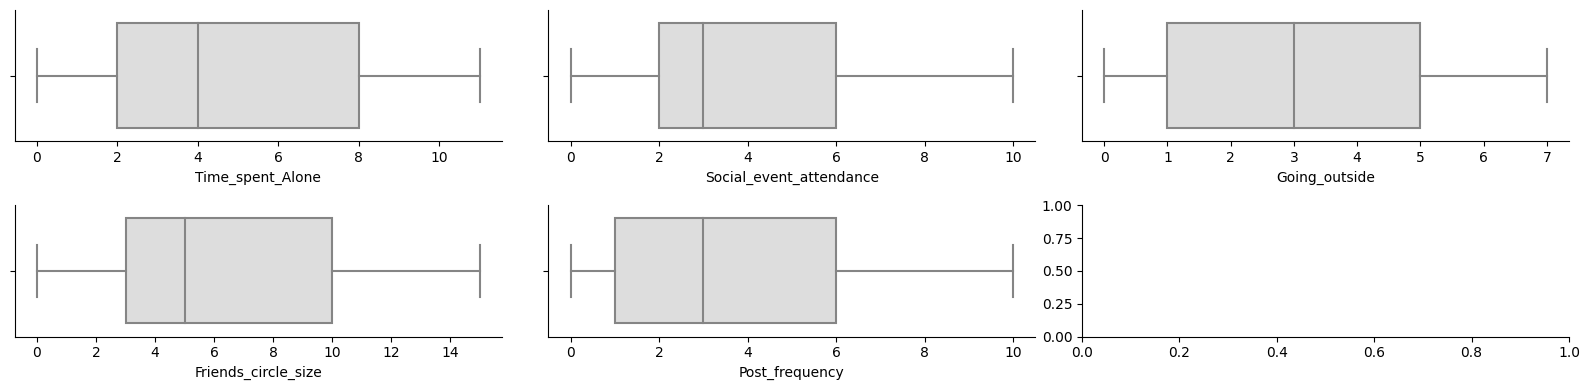

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 4))

ax[0,0] = sns.boxplot(data=df, x= 'Time_spent_Alone', color='#DDDDDD', ax=ax[0,0])
ax[0,1] = sns.boxplot(data=df, x= 'Social_event_attendance', color='#DDDDDD', ax=ax[0,1])
ax[0,2] = sns.boxplot(data=df, x= 'Going_outside', color='#DDDDDD', ax=ax[0,2])
ax[1,0] = sns.boxplot(data=df, x= 'Friends_circle_size', color='#DDDDDD', ax=ax[1,0])
ax[1,1] = sns.boxplot(data=df, x= 'Post_frequency', color='#DDDDDD', ax=ax[1,1])

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [8]:
#Getting Object columns to assess missing values

object_df_columns = df.select_dtypes(include='object').columns.tolist()
object_df_columns.remove('Personality')
df[object_df_columns].mode()

,Stage_fear,Drained_after_socializing
0,No,No


In [9]:
# Since we have no outliers and <5% are missing, we will input the mode in the Object columns and the mean in the numeric columns. 

df_v2 = df
df_v2[object_df_columns] = df_v2[object_df_columns].apply(lambda col: col.fillna(col.mode()[0]))
df_v2[numeric_df_columns] = df_v2[numeric_df_columns].apply(lambda col: col.fillna(col.mean()))
df_v2.isna().mean() # checking the number of outliers after treatment

Time_spent_Alone             0.0
Stage_fear                   0.0
Social_event_attendance      0.0
Going_outside                0.0
Drained_after_socializing    0.0
Friends_circle_size          0.0
Post_frequency               0.0
Personality                  0.0
dtype: float64

##### **Encoding Categorical features**

In [10]:
df_v2['Stage_fear'] = df_v2['Stage_fear'].map({'Yes':1, 'No':0})
df_v2['Drained_after_socializing'] = df_v2['Drained_after_socializing'].map({'Yes':1, 'No':0})
df_v2['Personality'] = df_v2['Personality'].map({'Extrovert':1, 'Introvert':0})
df_v2.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


## **Statistical Analysis**
    This step seeks to understand the interaction and correlation among the features. Here it's possible to check multicolinearity, plot visulizations and highlight key points.
--

##### **Visualization plots to describe the data**

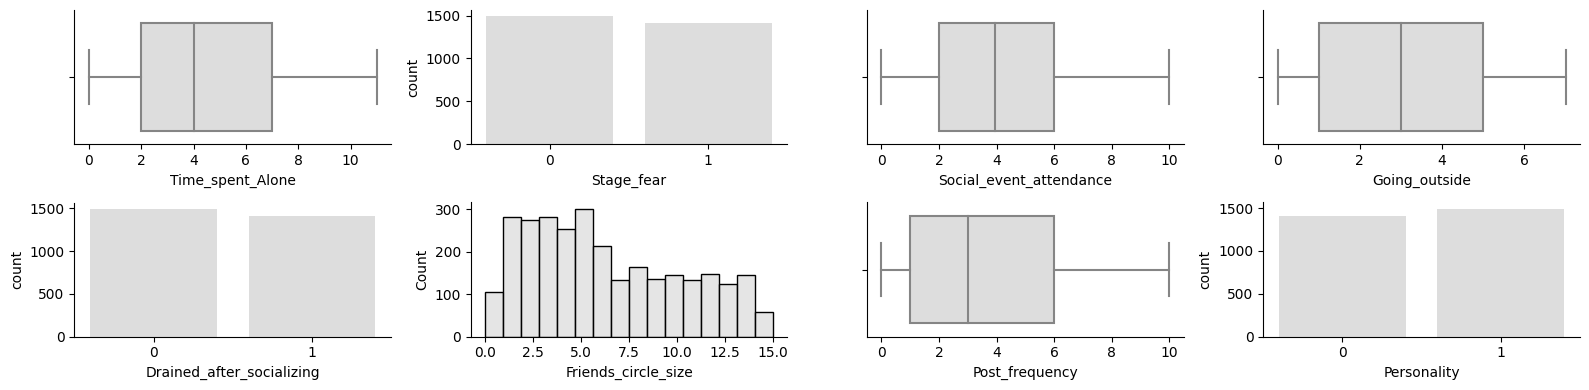

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 4))

ax[0,0] = sns.boxplot(data=df_v2, x= 'Time_spent_Alone', color='#DDDDDD', ax=ax[0,0])
ax[0,1] = sns.countplot(data=df_v2, x= 'Stage_fear', color='#DDDDDD', ax=ax[0,1])
ax[0,2] = sns.boxplot(data=df_v2, x= 'Social_event_attendance', color='#DDDDDD', ax=ax[0,2])
ax[0,3] = sns.boxplot(data=df_v2, x= 'Going_outside', color='#DDDDDD', ax=ax[0,3])
ax[1,0] = sns.countplot(data=df_v2, x= 'Drained_after_socializing', color='#DDDDDD', ax=ax[1,0])
ax[1,1] = sns.histplot(data=df_v2, x= 'Friends_circle_size', color='#DDDDDD', ax=ax[1,1])
ax[1,2] = sns.boxplot(data=df_v2, x= 'Post_frequency', color='#DDDDDD', ax=ax[1,2])
ax[1,3] = sns.countplot(data=df_v2, x= 'Personality', color='#DDDDDD', ax=ax[1,3])

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

##### **Correlation of features**

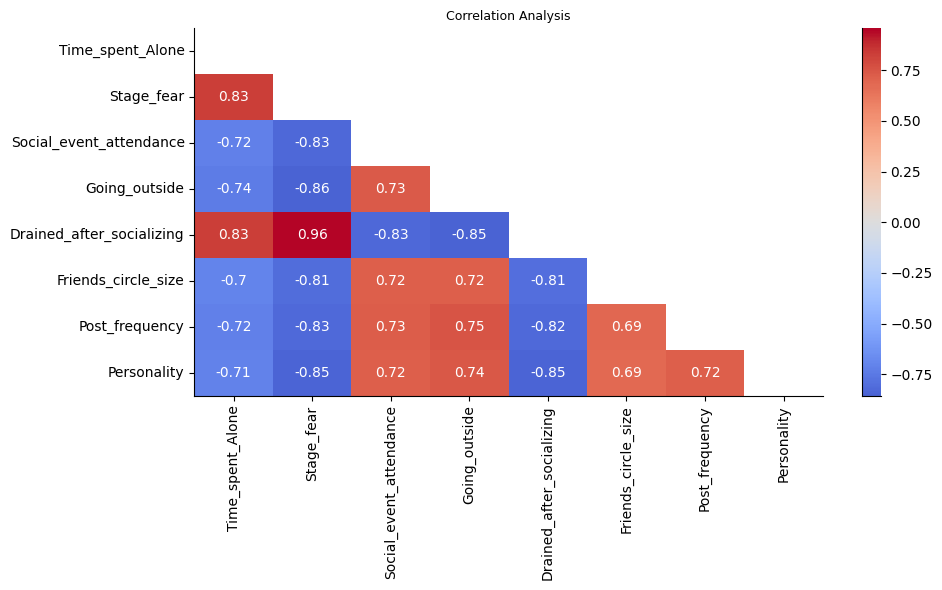

In [12]:
corr = df_v2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # Mask to remove the upper side and facilitate visualization

plt.figure(figsize=(10,6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.title("Correlation Analysis", fontsize=9)
plt.tight_layout()

##### **Descriptive statistics of the Personality groups**

In [13]:
introverts_statistics = df_v2['Personality'] == 0
df_v2[introverts_statistics].describe().round(2)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,1409.00,1409.00,1409.00,1409.00,1409.00,1409.00,1409.00,1409.0
mean,7.03,0.92,1.83,1.31,0.92,3.28,1.42,0.0
std,2.61,0.27,1.73,1.39,0.27,2.57,1.58,0.0
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,5.00,1.00,1.00,0.00,1.00,2.00,0.00,0.0
50%,7.00,1.00,2.00,1.00,1.00,3.00,1.00,0.0
75%,9.00,1.00,3.00,2.00,1.00,4.00,2.00,0.0
max,11.00,1.00,9.00,7.00,1.00,14.00,9.00,0.0


In [14]:
extroverts_statistics = df_v2['Personality'] == 1
df_v2[extroverts_statistics].describe().round(2)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,1491.00,1491.00,1491.00,1491.00,1491.00,1491.00,1491.00,1491.0
mean,2.12,0.07,5.98,4.60,0.07,9.10,5.59,1.0
std,2.21,0.26,2.21,1.59,0.26,3.49,2.34,0.0
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
25%,1.00,0.00,4.00,4.00,0.00,6.27,4.00,1.0
50%,2.00,0.00,6.00,5.00,0.00,9.00,6.00,1.0
75%,3.00,0.00,8.00,6.00,0.00,12.00,7.00,1.0
max,11.00,1.00,10.00,7.00,1.00,15.00,10.00,1.0


## **Insights**
--

### **Statistics**:
* Extrovert people tend to spend much more time on average speaking with other people, posting and going outside while introverts tend to stay alone and don't have big friendship circles. This results in stage fear, less social event attendance and also the out of energy feeling when they need to interact with more people.
* The dependent Y (Personality) variable fits too well with the data collected. It means that it's easy to understand the correlation of the X features with the Y, and based on this data, a ML model would perform very well, however would also present overfitting tendencies.

# **Thank You for taking the time to view this Notebook**!
​
If you found this analysis useful and have any feedback or suggestions, don't hesitate to contact me! We are here to learn!